In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ex1data2.txt",header = None)
X = df.iloc[:,[0,1]].values
X = X.astype(float)
y = df.iloc[:,2].values
print("X: " + str(X.shape))
print("y: " + str(y.shape))
y=y.reshape(y.shape[0],1)
print("y: "+ str(y.shape))

X: (47, 2)
y: (47,)
y: (47, 1)


In [5]:
def predict(X,theta):
    pred_y = np.dot(X,theta)
    return pred_y

In [6]:
def feature_norm(X):
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    for j in range(X.shape[1]):
        mu[:,j] = np.mean(X[:,j],axis=0)
        sigma[:,j] = np.std(X[:,j],axis=0)
        X[:,j] = (X[:,j] - mu[:,j])/sigma[:,j]
    return X

In [7]:
def computecost(X,y,theta):
    m = X.shape[0]
    hq = predict(X,theta)
    J = np.sum(pow((hq-y),2),axis=0)/(2*m)
    return J

In [12]:
def gradientdescent(X, y, theta, alpha, num_iter):
    m = X.shape[0]
    J_history = np.zeros((num_iter,1))
    
    for i in range(0,num_iter):
        prd_y = predict(X,theta)
        dJ = np.sum(((prd_y-y)*X),axis=0)/m
        dJ = dJ.reshape(dJ.shape[0],1)
        theta = theta - alpha*dJ
        J_history[i] = computecost(X,y,theta)
        
    return theta,J_history

In [27]:
X_mask = X
X_mask = feature_norm(X_mask)
X_0 = np.ones((X_mask.shape[0],1))
X_mask = np.concatenate((X_0,X_mask),axis=1)
# print(X_mask)

theta = np.zeros((X_mask.shape[1],1))
theta,J_history = gradientdescent(X_mask, y, theta, 0.01, 400)
print(theta)
print(J_history.shape)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
(400, 1)


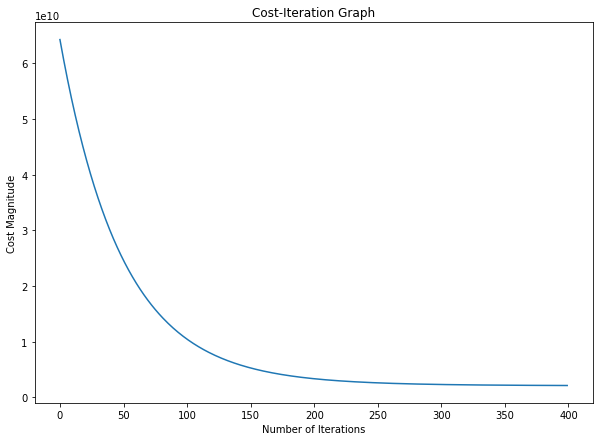

In [28]:
a = np.arange(0,len(J_history))
fig = plt.figure(figsize=(10,7))
plt.plot(a,J_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Magnitude')
plt.title("Cost-Iteration Graph")
plt.show()

# Normal Equation For Theta Calculation

In [32]:
X_mask_T = X_mask.transpose()
theta_nq1 = np.linalg.inv((np.dot(X_mask_T,X_mask)))
theta_nq2 = np.dot(theta_nq1,X_mask_T)
theta1 = np.dot(theta_nq2,y)
theta1

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])